## FFT idea

FFT is a transformation of a time series signal from time domain to frequency domain; It is based on the 
Fourier law that 'Any signal can be reprsented as sum of sinusoidal signals'. FFT is a method to identify
the major signals in given signal

A time series signal - g(t), when multiplied by a e^(2*pi*f*t) function (f = frequency of the signal,
t = time period) gets rotated around the origin. The winding frequency is decided by us. Based on the winding
frequency and the frequency of the signal, the 2d centre of mass of the signal is shifted. The fft graph shows
a peak when the winding frequency mathces the frequency of one of the components. 

FFT gives list of complex conjugates as output. So if there are N data points in input signal, (N/2) unique real
components are returned. Phase angle is indicated by teh imaginary component 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 12)
plt.rcParams.update({'font.size' : 16})

## Example implementation - source : Steve Brunton video

### Creating sample signal as sum of two sinusoids

In [2]:
dt = 0.001
t = np.arange(0, 1.0, dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
f_clean = f
f = f + 2.5 * np.random.randn((len(t)))

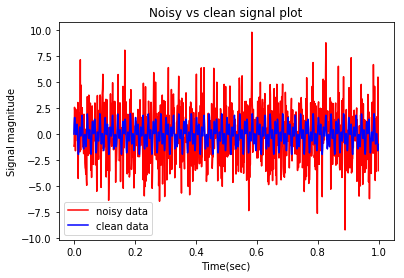

In [3]:
plt.plot(t, f, 'r', label='noisy data');
plt.plot(t, f_clean, 'b', label='clean data');
plt.xlabel('Time(sec)')
plt.ylabel('Signal magnitude')
plt.title('Noisy vs clean signal plot')
plt.legend();

FFT returns a vector of frequency coefficients that have a magnitude and phase, magnitude indicating how important
that particular frequency is.

### FFT, PSD  of the signal

In [4]:
n = len(t)
fhat = np.fft.fft(f, n)                      # FFT of the signal
PSD = fhat * np.conj(fhat) / n               # power spectrun (power per frequency)
freq = (1/(t[-1])) * np.arange(n)            # create list of frequencise for x axis
L = np.arange(1, np.floor(n/2), dtype='int') # plot the first half of frequencies alone

In [5]:
print(fhat.shape)
print(fhat[0:10])

(1000,)
[-74.27275284  +0.j         -25.90849871 +80.95454897j
  16.84571848 -66.26996311j  -3.31704972 -14.32836486j
 -72.63134501-127.45191261j  50.94961854 -25.89006822j
  58.22146846 +37.03398536j 134.15227187 +11.10691778j
  -9.5182998  +67.55640299j -15.63218529 -41.71848287j]


/home/wabco/miniconda3/envs/face_detection/lib/python3.5/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


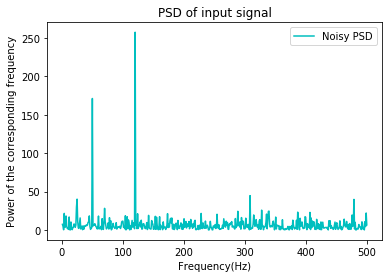

In [6]:
plt.plot(freq[L], PSD[L], c = 'c', label = 'Noisy PSD')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power of the corresponding frequency')
plt.title('PSD of input signal')
plt.legend();

### Denoising the input signal

In [7]:
indices = PSD > 100                       # Find indices with higher power
fhat_clean = fhat *indices                # filter frequencies with high power (zero out other fourier coefficients) 
PSD_clean  = PSD * indices                # Zero out those with lower power
f_filtered = np.fft.ifft(fhat_clean)      # inverse fft to get signal in time domain

/home/wabco/miniconda3/envs/face_detection/lib/python3.5/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


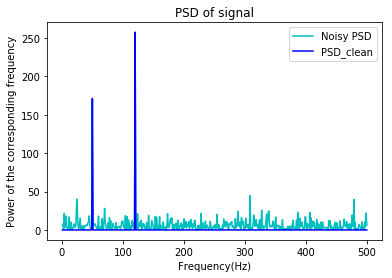

In [8]:
plt.plot(freq[L], PSD[L], c = 'c', label = 'Noisy PSD')
plt.plot(freq[L], PSD_clean[L], c = 'b', label = 'PSD_clean')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power of the corresponding frequency')
plt.title('PSD of signal')
plt.legend();

/home/wabco/miniconda3/envs/face_detection/lib/python3.5/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


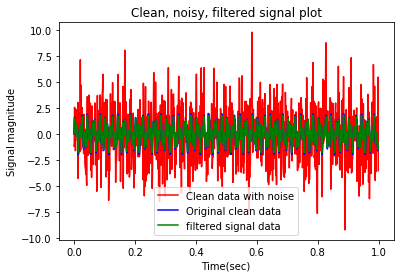

In [9]:
plt.plot(t, f, 'r', label='Clean data with noise');
plt.plot(t, f_clean, 'b', label='Original clean data');
plt.plot(t, f_filtered, 'g', label='filtered signal data');
plt.xlabel('Time(sec)')
plt.ylabel('Signal magnitude')
plt.title('Clean, noisy, filtered signal plot')
plt.legend();

/home/wabco/miniconda3/envs/face_detection/lib/python3.5/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


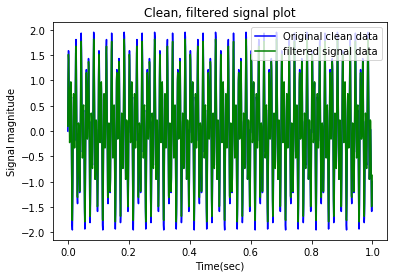

In [10]:
plt.plot(t, f_clean, 'b', label='Original clean data');
plt.plot(t, f_filtered, 'g', label='filtered signal data');
plt.xlabel('Time(sec)')
plt.ylabel('Signal magnitude')
plt.title('Clean, filtered signal plot')
plt.legend();

## Applications

Many applications for FFt depending on domain. Generally in sensors, signals

1. Removing noise - Identifying the signal frequency components and noise frequency components

2. Once noise frequency is found, a bandpass filter (or high pass or low pass filters) can be used 
to get the desired components alone

3. PSD - Power spectral density is important concept where the magnitude of the signal is plotted against the
frequency (x-axis)

## Reference

1. https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/

2. https://www.youtube.com/watch?v=spUNpyF58BY

3. Denoising data with FFT - python by Steve Brunton 
   https://www.youtube.com/watch?v=s2K1JfNR7Sc
   